In [455]:
dataset_dir = 'C:/Users/smallBird/Desktop/OT/EXP21_5_5/dataset'

In [456]:
import os.path

train_path = os.path.join(dataset_dir, 'train')
test_path = os.path.join(dataset_dir, 'test')

print('训练集路径：', train_path)
print('测试集路径：', test_path)

训练集路径： C:/Users/smallBird/Desktop/OT/EXP21_5_5/dataset\train
测试集路径： C:/Users/smallBird/Desktop/OT/EXP21_5_5/dataset\test


In [457]:
from torchvision import datasets
from torchvision import transforms

In [458]:
# 使用计算出的均值和标准差
mean = [0.74673263, 0.78853836, 0.77793464]
std = [0.02704629, 0.02393791, 0.02220872]

train_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean, std)])
test_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(
                                          mean = mean,
                                          std = std)])

In [459]:
import torch
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('DEVICE: ', DEVICE)

DEVICE:  cuda:0


In [460]:
train_dataset = datasets.ImageFolder(train_path, train_transform)
test_dataset = datasets.ImageFolder(test_path, test_transform)

In [461]:
print('훈련집 이미지 수량： ', len(train_dataset))
print('분류종류개수： ', len(train_dataset.classes))
print('각분류명칭： ', train_dataset.classes)

훈련집 이미지 수량：  8503
분류종류개수：  5
각분류명칭：  ['Empty', 'Empty_N', 'Enter', 'Full', 'Leave']


In [462]:
class_names = train_dataset.classes
n_class = len(class_names)

In [463]:
class_names

['Empty', 'Empty_N', 'Enter', 'Full', 'Leave']

In [464]:
train_dataset.class_to_idx

{'Empty': 0, 'Empty_N': 1, 'Enter': 2, 'Full': 3, 'Leave': 4}

In [465]:
#54*72
import torch
import torch.nn as nn
import torch.nn.functional as F
class myCNN(nn.Module):
    def __init__(self):
        super(myCNN, self).__init__()

        #初始化卷积层
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3)  # Output: (52, 70)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=9, kernel_size=3)  # Output: (50, 68)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Output: (25, 34)
        self.conv3 = nn.Conv2d(in_channels=9, out_channels=12, kernel_size=3)  # Output: (23, 32)
        self.conv4 = nn.Conv2d(in_channels=12, out_channels=15, kernel_size=3)  # Output: (21, 30)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # Output: (10, 15)
        
        #计算全连接层输入大小
        self.fc_input_size = 15 * 10 * 15
        self.fc1 = nn.Linear(self.fc_input_size, 15)
        self.fc2 = nn.Linear(15, 10)
        self.fc3 = nn.Linear(10, 5)  # 假设fc3的输出是10，这应该基于你的具体任务来设定

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool2(x)

        x = x.view(-1, self.fc_input_size)
        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)

        return x
        

In [466]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
EPOCHS = 5
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = False)

In [467]:
for (X_train, y_train) in train_loader:
  print('X_train: ', X_train.size(), 'type: ', X_train.type())
  print('y_train: ', y_train.size(), 'type: ', y_train.type())
  break

X_train:  torch.Size([32, 3, 72, 54]) type:  torch.FloatTensor
y_train:  torch.Size([32]) type:  torch.LongTensor


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

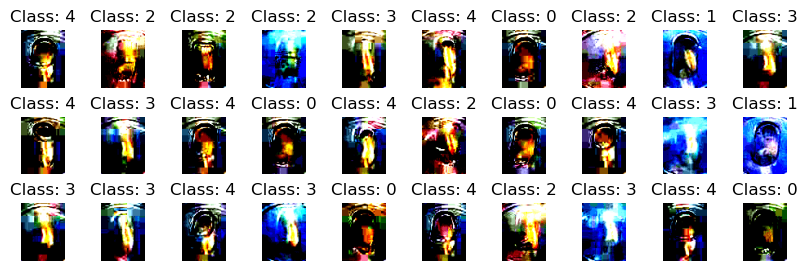

In [468]:
import matplotlib.pyplot as plt
import numpy as np
pltsize = 1
plt.figure(figsize=(10*pltsize,3*pltsize))

for i in range(30):
  plt.subplot(3, 10, i+1)
  plt.axis('off')
  plt.imshow(np.transpose(X_train[i], (1,2,0)))
  plt.title('Class: ' + str(y_train[i].item()))

plt.subplots_adjust(wspace=0.5, hspace=0.5)  # 调整子图之间的水平和垂直间隔
plt.show()  # 显示图形

In [469]:
model = myCNN().to(DEVICE)

In [470]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

In [471]:
print(model)

myCNN(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 9, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(9, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(12, 15, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2250, out_features=15, bias=True)
  (fc2): Linear(in_features=15, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=5, bias=True)
)


In [472]:
print(len(train_loader.dataset))

8503


In [473]:
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx, (image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)

    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()
    #print(batch_idx)
    #print(len(image))
    if batch_idx % log_interval == 0:
      dangqian = (batch_idx+1) * len(image)
      # print("batch_idx: ", batch_idx)
      # print("len(image): ", len(image))
      # print("dangqian: ", dangqian)

      jindu = 100. * (batch_idx+1) / len(train_loader)
      # print("batch_idx: ", batch_idx)
      # print("len(train_loader): ", len(train_loader))
      # print("jindu: ", jindu)

      #print("Train Epoch: ", epoch, batch_idx * len(image)," / ", len(train_loader.dataset, "Train Loss: ", ) )# {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(epoch, (batch_idx * len(image)),len(train_loader.dataset), 100. * batch_idx / len(train_loader),loss.item()))
      print("Train Epoch: {} [{:.0f}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(epoch, dangqian/32,len(train_loader), jindu,loss.item()))

  return loss.item()

In [474]:
import sys

def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for image, label in test_loader:
      image = image.to(DEVICE)
      label = label.to(DEVICE)

      output = model(image)

      test_loss += criterion(output, label).item()

      prediction = output.max(1, keepdim=True)[1]

      correct += prediction.eq(label.view_as(prediction)).sum().item()

  test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
  test_accuracy = 100. * correct / len(test_loader.dataset)
  return test_loss, test_accuracy


In [475]:
train_losses = []
test_losses = []
test_accuracies = []
for epoch in range(1, EPOCHS+1):
  train_loss = train(model, train_loader, optimizer, log_interval=100)
  train_losses.append(train_loss)

  test_loss, test_accuracy = evaluate(model, test_loader)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)

  print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:2f} % \n".format(epoch, test_loss, test_accuracy))

Train Epoch: 1 [1/266 (0%)]	Train Loss: 1.596923
Train Epoch: 1 [101/266 (38%)]	Train Loss: 0.122855
Train Epoch: 1 [201/266 (76%)]	Train Loss: 0.018748

[EPOCH: 1], 	Test Loss: 0.0170, 	Test Accuracy: 99.576471 % 

Train Epoch: 2 [1/266 (0%)]	Train Loss: 0.001603
Train Epoch: 2 [101/266 (38%)]	Train Loss: 0.008770
Train Epoch: 2 [201/266 (76%)]	Train Loss: 0.002367

[EPOCH: 2], 	Test Loss: 0.0232, 	Test Accuracy: 99.376471 % 

Train Epoch: 3 [1/266 (0%)]	Train Loss: 0.000677
Train Epoch: 3 [101/266 (38%)]	Train Loss: 0.002225
Train Epoch: 3 [201/266 (76%)]	Train Loss: 0.019959

[EPOCH: 3], 	Test Loss: 0.0111, 	Test Accuracy: 99.694118 % 

Train Epoch: 4 [1/266 (0%)]	Train Loss: 0.064517
Train Epoch: 4 [101/266 (38%)]	Train Loss: 0.001218
Train Epoch: 4 [201/266 (76%)]	Train Loss: 0.001029

[EPOCH: 4], 	Test Loss: 0.0059, 	Test Accuracy: 99.811765 % 

Train Epoch: 5 [1/266 (0%)]	Train Loss: 0.006144
Train Epoch: 5 [101/266 (38%)]	Train Loss: 0.007982
Train Epoch: 5 [201/266 (76%)]	Trai

In [477]:
torch.save(model, 'C:/Users/smallBird/Desktop/OT/EXP29_5_5/model-D-20240531_19_99_34pp.pth')

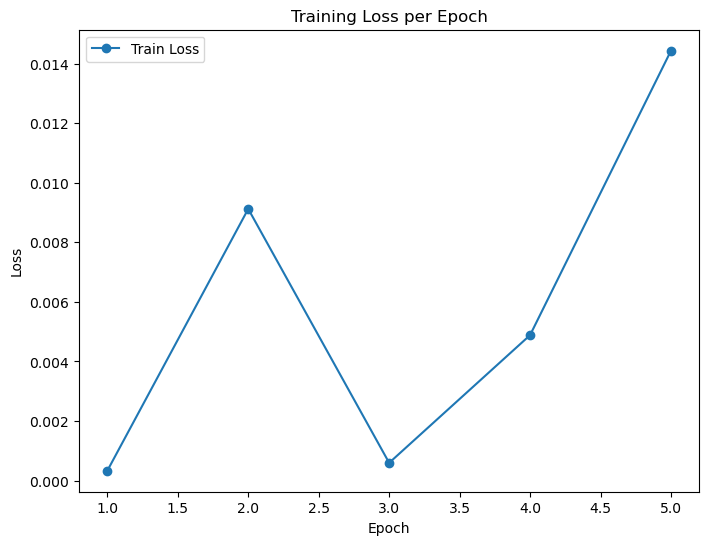

In [481]:
# Plot 1: Training Loss per Epoch
plt.figure(figsize=(8, 6))
plt.plot(range(1, EPOCHS+1), train_losses, marker='o', label='Train Loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.grid(True)
plt.legend()
plt.show()

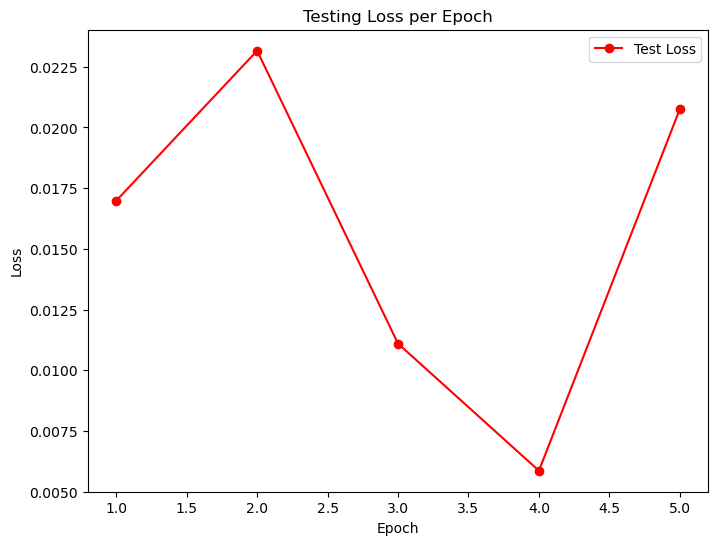

In [482]:
# Plot 2: Testing Loss per Epoch
plt.figure(figsize=(8, 6))
plt.plot(range(1, EPOCHS+1), test_losses, marker='o', color='red', label='Test Loss')
plt.title('Testing Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.grid(True)
plt.legend()
plt.show()

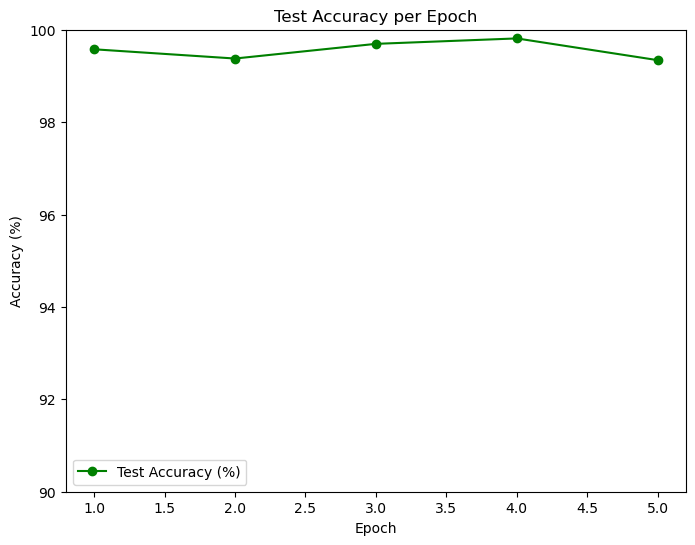

In [483]:
# 定义 EPOCHS 和 test_accuracies
EPOCHS = 5
# test_accuracies = [95.729412, 99.247059, 99.682353, 99.505882, 99.764706]

# 绘制测试精度图
plt.figure(figsize=(8, 6))
plt.plot(range(1, EPOCHS + 1), test_accuracies, marker='o', color='green', label='Test Accuracy (%)')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.ylim(90, 100)  # 假设精度是百分比
plt.legend()
plt.show()

In [ ]:
print(train_losses)
print(test_losses)
print(test_accuracies)